### transforms

In [71]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

* dataloader의 인자로 들어갈 transform을 미리 정의가능
* Compose를 통해 리스트 안에 순서대로 전처리 진행
* ToTensor()은 torchvision이 PIL image 형태로만 입력을 받기 때문에 데이터 처리를 위해 Tensor형으로 변환 필요

In [72]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [73]:
trainset = datasets.MNIST(root="C:/Users/jongcheol/OneDrive/바탕 화면/Semester2",
                          train=True,
                          download=False,
                          transform=mnist_transform)

testset = datasets.MNIST(root="C:/Users/jongcheol/OneDrive/바탕 화면/Semester2",
                          train=False,
                          download=False,
                          transform=mnist_transform)

### DataLoader
* DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때, batch_size 크기만큼 데이터를 가져온다.

In [74]:
train_loader = DataLoader(trainset, batch_size=8,
                          shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8,
                         shuffle=False, num_workers=2)

In [75]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

* shape: (B, C, H, W)
* 즉, 28*28 흑백(Channel=1)이미지가 8장있다는 뜻

In [76]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

* images[0]의 shape: (1,28,28)

In [77]:
torch.randint(200, size=(1,)).item()

59

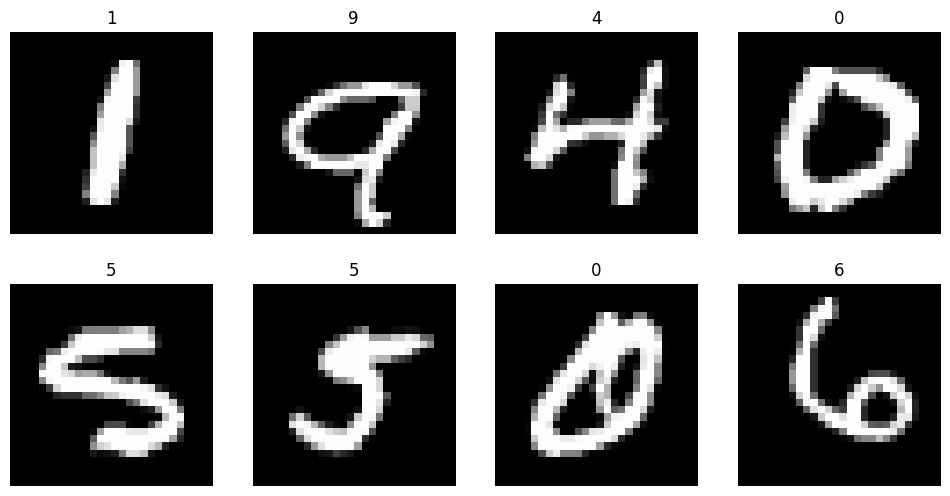

In [78]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### 신경망 구성
* 레이어(layer)
* 모듈(module): 한 개 이상의 레이어가 모여서 구성
* 모델(model): 한 개 이상의 모듈이 모여서 구성

In [79]:
import torch.nn as nn

### Linear 계층

In [80]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
    # 입력 피처 수, 출력 피처 수
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 1.4342, -2.0548,  0.4987,  ...,  1.1025, -0.6749,  2.8843],
        [-1.5529,  0.8117, -0.4023,  ...,  1.5317, -0.1814,  0.9644],
        [-1.1607,  0.4312,  0.1180,  ...,  1.2219,  0.4279,  1.3598],
        ...,
        [ 1.6376, -0.8262,  1.4878,  ...,  1.0909, -1.6418,  0.2688],
        [ 1.0361, -0.2941,  0.6751,  ..., -0.3537, -1.4676,  0.7515],
        [ 0.7312, -1.5845, -0.0918,  ..., -0.4252,  0.5878, -0.3761]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 5.1044e-01, -4.8491e-01, -1.6822e-01,  ..., -1.2728e-02,
         -3.8251e-04, -1.1199e+00],
        [ 3.8077e-01, -2.3814e-01,  3.2584e-01,  ...,  3.1523e-01,
          3.5197e-01,  4.9203e-01],
        [ 5.5465e-01, -8.2808e-01,  4.4989e-01,  ..., -4.2950e-01,
          1.1032e+00, -8.9268e-01],
        ...,
        [-1.6712e-01, -5.6033e-01, -3.8918e-01,  ...,  1.1038e+00,
         -7.5037e-01,  4.0322e-01],
        [-1.3971e-01, -7.0750e-01, -3.1304e-01,  ..., -3.3141e-02,
         -5.8956e-03, -

### Conv2d 계층

In [81]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [82]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1),
               padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [83]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어 자세히 보기

In [84]:
nn.Conv2d(in_channels=1,
          out_channels=20,
          kernel_size=5,
          stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [85]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [86]:
weight = layer.weight
print(weight.shape)

torch.Size([20, 1, 5, 5])


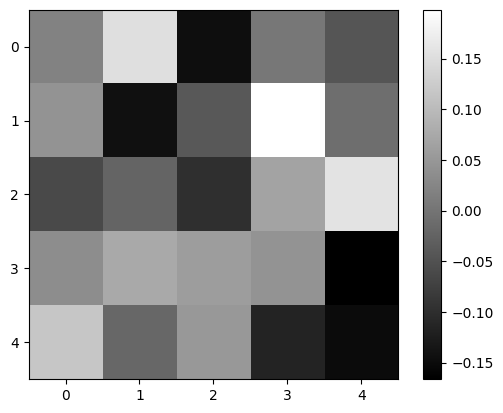

In [87]:
plt.imshow(weight[0, 0, :, :].detach().numpy(),
            'grey')
plt.colorbar()
plt.show()

In [91]:
print(images.shape)
print(images[0].shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
